In [1]:
from pyit2fls import IT2Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                    product_t_norm, probabilistic_sum_s_norm, crisp, min_t_norm, max_s_norm, tri_mf, ltri_mf, rtri_mf, const_mf, IT2FS, MEET, EIASC_algorithm, Centroid
from numpy import linspace, meshgrid, zeros
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


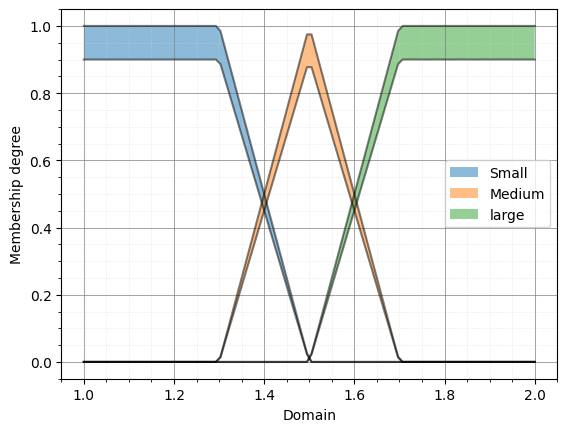

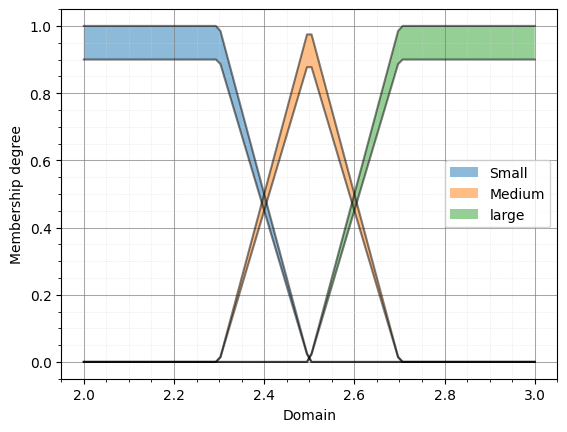

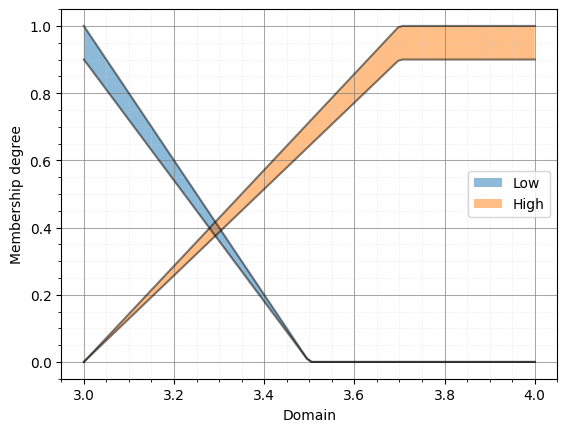

In [2]:
domain1 = linspace(1., 2., 100)
domain2 = linspace(2., 3., 100)
domain3 = linspace(3., 4., 100)

Large1  = IT2FS(domain1,
                ltri_mf, [1.5, 1.7, 1],
                ltri_mf, [1.5, 1.7, 0.9],
                check_set=True)
Small1= IT2FS(domain1,
                rtri_mf, [1.5, 1.3, 1],
                rtri_mf, [1.5, 1.3, 0.9],
                check_set=True)
Medium1 = IT2FS(domain1,
                tri_mf, [1.3, 1.5, 1.7, 1],
                tri_mf, [1.3, 1.5, 1.7, 0.9],
                check_set=True)


Large2  = IT2FS(domain2,
                ltri_mf, [2.5, 2.7, 1],
                ltri_mf, [2.5, 2.7, 0.9],
                check_set=True)
Small2= IT2FS(domain2,
                rtri_mf, [2.5, 2.3, 1],
                rtri_mf, [2.5, 2.3, 0.9],
                check_set=True)
Medium2 = IT2FS(domain2,
                tri_mf, [2.3, 2.5, 2.7, 1],
                tri_mf, [2.3, 2.5, 2.7, 0.9],
                check_set=True)

Low1  = IT2FS(domain3,
                rtri_mf, [3.5, 3, 1],
                rtri_mf, [3.5, 3, 0.9],
                check_set=True)
High1 = IT2FS(domain3,
                ltri_mf, [3, 3.7, 1],
                ltri_mf, [3, 3.7, 0.9],
                check_set=True)
IT2FS_plot(Small1, Medium1, Large1,
        legends=["Small", "Medium", "large"])
IT2FS_plot(Small2, Medium2, Large2,
        legends=["Small", "Medium", "large"])
IT2FS_plot(Low1, High1,
            legends=["Low", "High"])

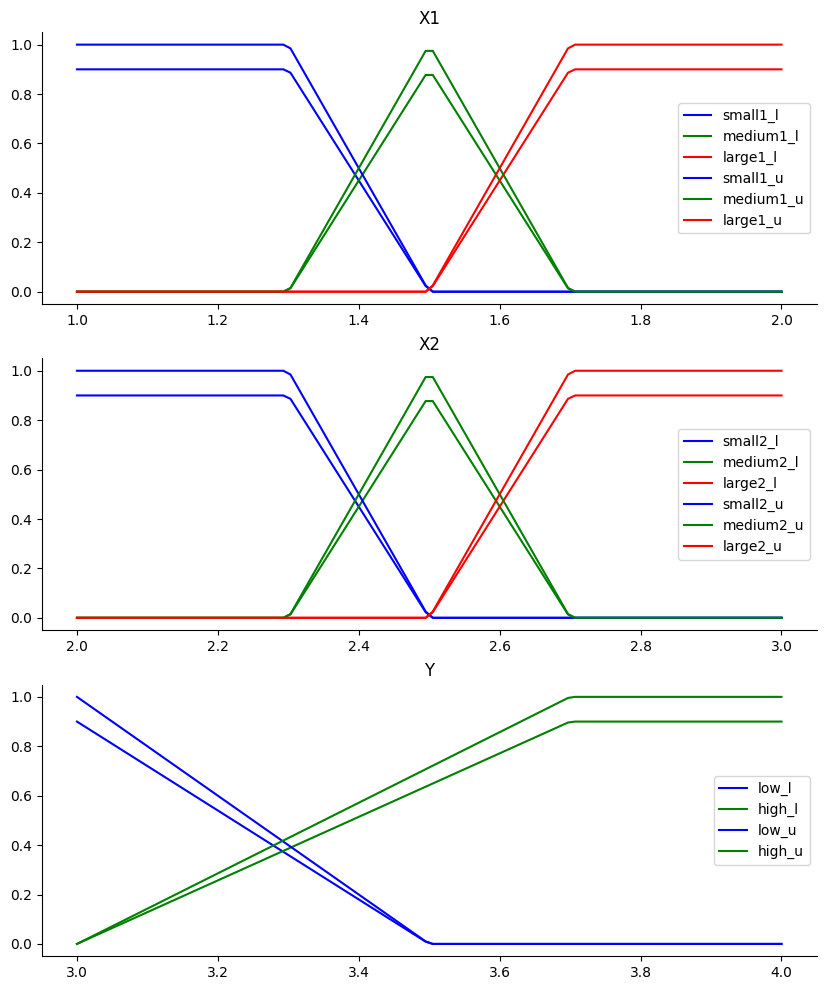

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import FuzzyEngines as FE

small1_l = fuzz.trapmf(domain1, [1, 1, 1.3, 1.5]) * 0.9
medium1_l = fuzz.trimf(domain1,[1.3,1.5,1.7]) * 0.9
large1_l = fuzz.trapmf(domain1, [1.5, 1.7, 2, 2]) * 0.9 

small1_u = fuzz.trapmf(domain1, [1, 1, 1.3, 1.5]) 
medium1_u = fuzz.trimf(domain1,[1.3,1.5,1.7]) 
large1_u = fuzz.trapmf(domain1, [1.5, 1.7, 2, 2]) 

small2_l = fuzz.trapmf(domain2, [2, 2, 2.3, 2.5]) * 0.9
medium2_l = fuzz.trimf(domain2,[2.3,2.5,2.7]) * 0.9
large2_l = fuzz.trapmf(domain2, [2.5, 2.7, 3, 3]) * 0.9 

small2_u = fuzz.trapmf(domain2, [2, 2, 2.3, 2.5]) 
medium2_u = fuzz.trimf(domain2,[2.3,2.5,2.7]) 
large2_u = fuzz.trapmf(domain2, [2.5, 2.7, 3, 3])

low_l = fuzz.trapmf(domain3, [3, 3, 3, 3.5]) * 0.9 
high_l = fuzz.trapmf(domain3, [3, 3.7, 4, 4]) * 0.9 
low_u = fuzz.trapmf(domain3, [3, 3, 3, 3.5]) 
high_u = fuzz.trapmf(domain3, [3, 3.7, 4, 4]) 

fig, (ax0, ax1, ax2 ) = plt.subplots(nrows=3, figsize=(10, 12))


ax0.plot(domain1, small1_l, 'b', linewidth=1.5, label='small1_l')
ax0.plot(domain1, medium1_l, 'g', linewidth=1.5, label='medium1_l')
ax0.plot(domain1, large1_l, 'r', linewidth=1.5, label='large1_l')
ax0.set_title('X1')
ax0.legend()

ax0.plot(domain1, small1_u, 'b', linewidth=1.5, label='small1_u')
ax0.plot(domain1, medium1_u, 'g', linewidth=1.5, label='medium1_u')
ax0.plot(domain1, large1_u, 'r', linewidth=1.5, label='large1_u')
ax0.set_title('X1')
ax0.legend()

ax1.plot(domain2, small2_l, 'b', linewidth=1.5, label='small2_l')
ax1.plot(domain2, medium2_l, 'g', linewidth=1.5, label='medium2_l')
ax1.plot(domain2, large2_l, 'r', linewidth=1.5, label='large2_l')
ax1.set_title('X2')
ax1.legend()

ax1.plot(domain2, small2_u, 'b', linewidth=1.5, label='small2_u')
ax1.plot(domain2, medium2_u, 'g', linewidth=1.5, label='medium2_u')
ax1.plot(domain2, large2_u, 'r', linewidth=1.5, label='large2_u')
ax1.set_title('X2')
ax1.legend()

ax2.plot(domain3, low_l, 'b', linewidth=1.5, label='low_l')
ax2.plot(domain3, high_l, 'g', linewidth=1.5, label='high_l')
ax2.set_title('Y')
ax2.legend()

ax2.plot(domain3, low_u, 'b', linewidth=1.5, label='low_u')
ax2.plot(domain3, high_u, 'g', linewidth=1.5, label='high_u')
ax2.set_title('Y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


plt.show()

In [4]:
rules = ['if X1 is small and X2 is small then Y is low', 
         'if X1 is small and X2 is medium then Y is low',
         'if X1 is small and X2 is large then Y is low',
         'if X1 is medium and X2 is small then Y is low',
         'if X1 is medium and X2 is medium then Y is low',
         'if X1 is medium and X2 is large then Y is high',
         'if X1 is large and X2 is small then Y is high',
         'if X1 is large and X2 is medium then Y is high',
         'if X1 is large and X2 is large then Y is high']

qfie_l = FE.QuantumFuzzyEngine(verbose=True)
qfie_l.input_variable(name='X1', range=domain1)
qfie_l.input_variable(name='X2', range=domain2)
qfie_l.output_variable(name='Y', range=domain3)
qfie_l.set_rules(rules=rules)
qfie_l.add_input_fuzzysets(var_name='X1', set_names=['small', 'medium', 'large'], sets=[small1_l, medium1_l, large1_l])
qfie_l.add_input_fuzzysets(var_name='X2', set_names=['small', 'medium', 'large'], sets=[small2_l, medium2_l, large2_l])
qfie_l.add_output_fuzzysets(var_name='Y', set_names=['low', 'high'], sets=[low_l, high_l])

qfie_u = FE.QuantumFuzzyEngine(verbose=True)
qfie_u.input_variable(name='X1', range=domain1)
qfie_u.input_variable(name='X2', range=domain2)
qfie_u.output_variable(name='Y', range=domain3)
qfie_u.set_rules(rules=rules)
qfie_u.add_input_fuzzysets(var_name='X1', set_names=['small', 'medium', 'large'], sets=[small1_u, medium1_u, large1_u])
qfie_u.add_input_fuzzysets(var_name='X2', set_names=['small', 'medium', 'large'], sets=[small2_u, medium2_u, large2_u])
qfie_u.add_output_fuzzysets(var_name='Y', set_names=['low', 'high'], sets=[low_u, high_u])



In [11]:
X1,X2 =1.65, 2.35
qfie_l.build_inference_qc({'X1':X1, 'X2':X2}, draw_qc=False, distributed=False)
qfie_l.execute(n_shots=5000,  transpile_info=False, plot_histo=True)[1]
print('alpha cuts', qfie_l.alpha_cuts)
alpha_cuts_l = qfie_l.alpha_cuts

print('______')

qfie_u.build_inference_qc({'X1':X1, 'X2':X2}, draw_qc=False, distributed=False)
qfie_u.execute(n_shots=5000,  transpile_info=False, plot_histo=False)[1]
print('alpha cuts', qfie_u.alpha_cuts)
alpha_cuts_u = qfie_u.alpha_cuts



{'X1': 1.65, 'X2': 2.35}
Input values  {'X1': [np.float64(0.0), np.float64(0.22500000000000026), np.float64(0.6749999999999997)], 'X2': [np.float64(0.674999999999999), np.float64(0.225000000000001), np.float64(0.0)]}
Running qc full_circuit on AerSimulator
Output Counts {'01': 0.1962, '10': 0.6146}
alpha cuts {'low': 0.1962, 'high': 0.6146}
______
{'X1': 1.65, 'X2': 2.35}
Input values  {'X1': [np.float64(0.0), np.float64(0.2500000000000003), np.float64(0.7499999999999997)], 'X2': [np.float64(0.7499999999999989), np.float64(0.2500000000000011), np.float64(0.0)]}
Running qc full_circuit on AerSimulator
Output Counts {'01': 0.2626, '10': 0.7374}
alpha cuts {'low': 0.2626, 'high': 0.7374}


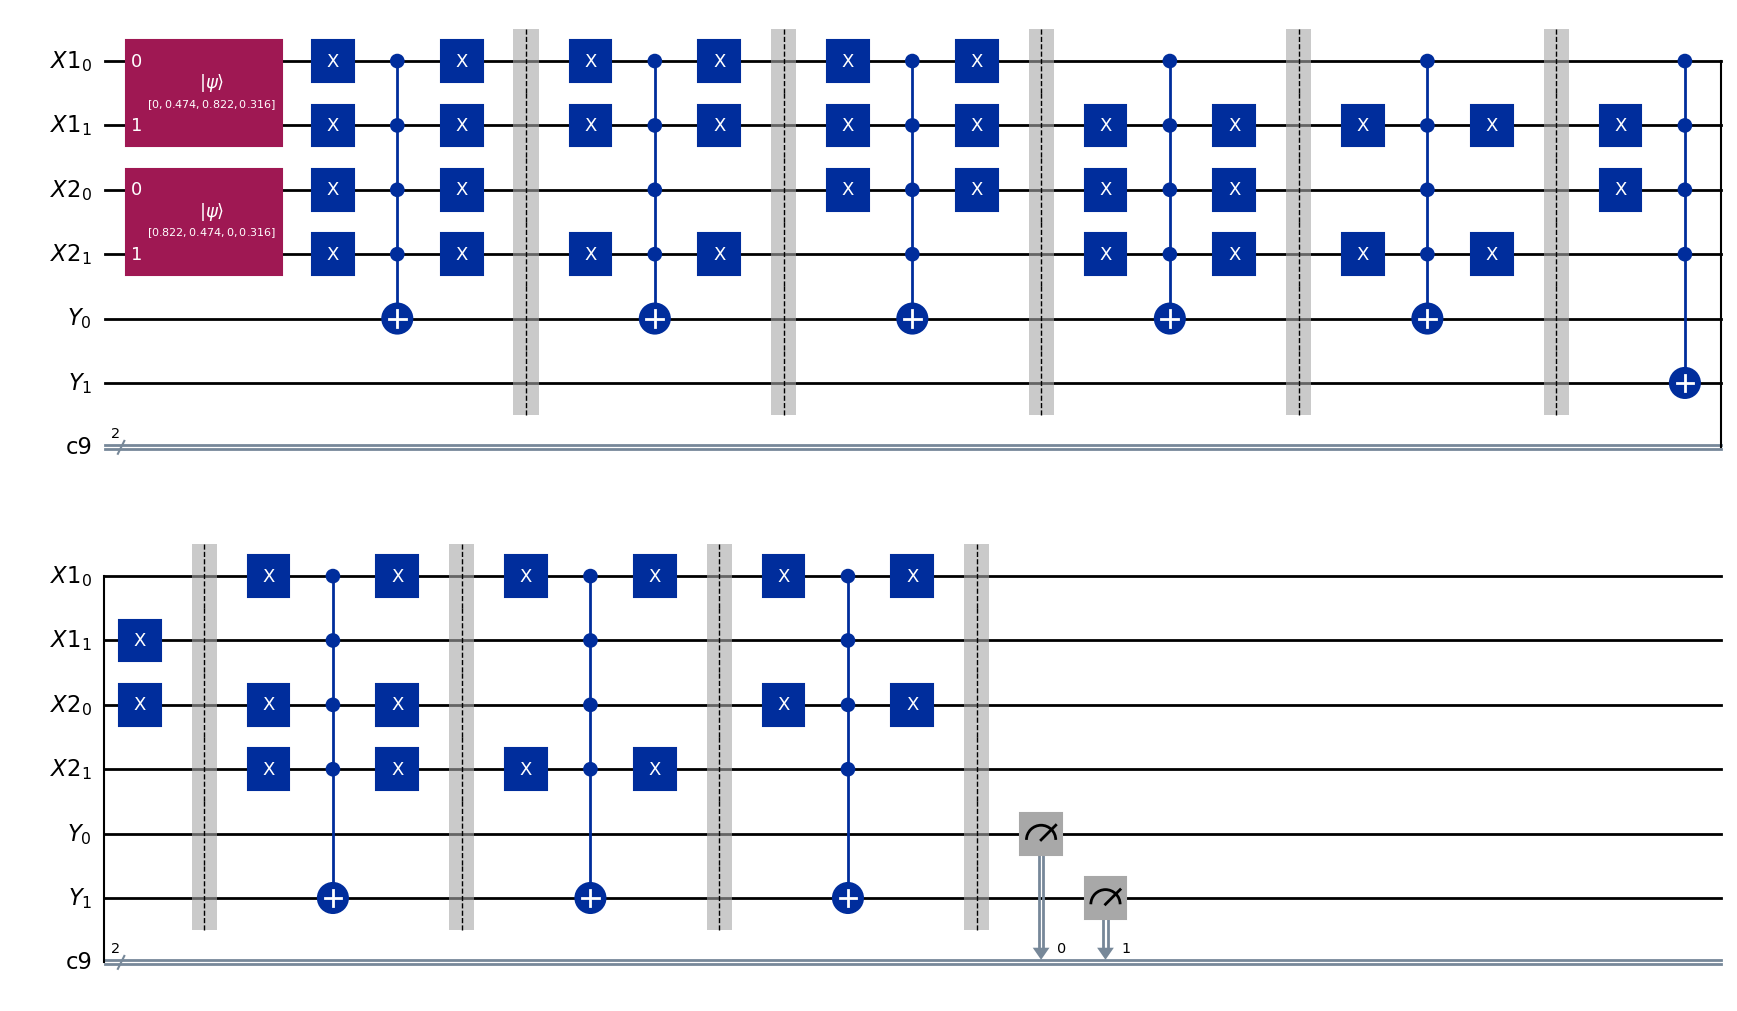

In [14]:
qfie_l.qc['full_circuit'].draw('mpl')

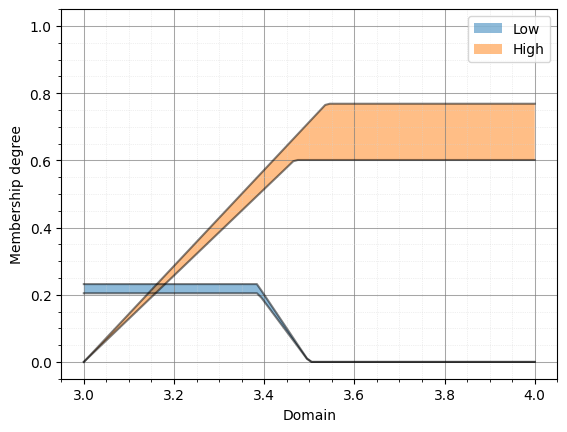

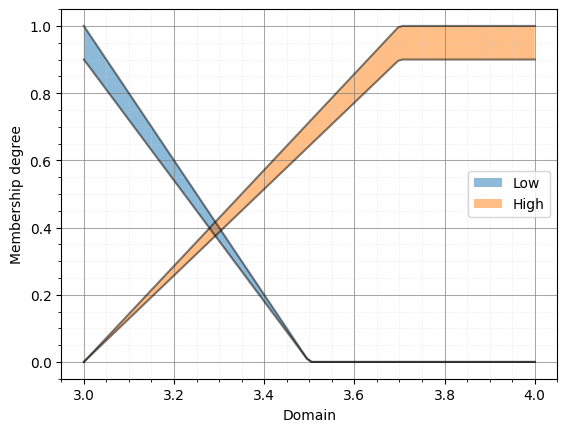

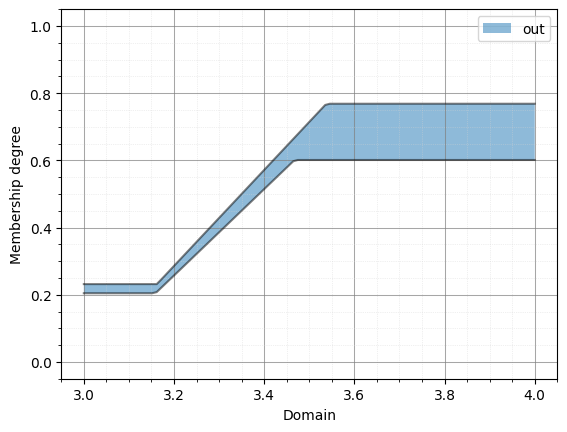

In [13]:
constant_LOW =  IT2FS(domain3, const_mf, [alpha_cuts_u['low']], const_mf, [alpha_cuts_l['low']] )
constant_HIGH =  IT2FS(domain3, const_mf, [alpha_cuts_u['high']], const_mf, [alpha_cuts_l['high']] )
out_low = MEET(domain3, min_t_norm, Low1, constant_LOW)
out_high = MEET(domain3, min_t_norm, High1, constant_HIGH)
out = MEET(domain3, max_s_norm, out_low, out_high)
IT2FS_plot(out_low, out_high,
            legends=["Low", "High"])
IT2FS_plot(Low1, High1,
            legends=["Low", "High"])
IT2FS_plot(out,
            legends=["out"])

In [7]:
centroids = Centroid(out, EIASC_algorithm, domain3)
y_out = np.average(centroids)
print(centroids)
print(y_out)

(np.float64(3.6264667268406763), np.float64(3.6566546729256886))
3.6415606998831827


{'X1': np.float64(1.0), 'X2': np.float64(2.0)}
Input values  {'X1': [np.float64(0.9), np.float64(0.0), np.float64(0.0)], 'X2': [np.float64(0.9), np.float64(0.0), np.float64(0.0)]}
Running qc full_circuit on AerSimulator
Output Counts {'01': 0.8156, '10': 0}
{'X1': np.float64(1.0), 'X2': np.float64(2.0)}
Input values  {'X1': [np.float64(1.0), np.float64(0.0), np.float64(0.0)], 'X2': [np.float64(1.0), np.float64(0.0), np.float64(0.0)]}
Running qc full_circuit on AerSimulator
Output Counts {'01': 1.0, '10': 0}
{'X1': np.float64(1.0), 'X2': np.float64(2.01010101010101)}
Input values  {'X1': [np.float64(0.9), np.float64(0.0), np.float64(0.0)], 'X2': [np.float64(0.9), np.float64(0.0), np.float64(0.0)]}
Running qc full_circuit on AerSimulator
Output Counts {'01': 0.8214, '10': 0}
{'X1': np.float64(1.0), 'X2': np.float64(2.01010101010101)}
Input values  {'X1': [np.float64(1.0), np.float64(0.0), np.float64(0.0)], 'X2': [np.float64(1.0), np.float64(0.0), np.float64(0.0)]}
Running qc full_circuit

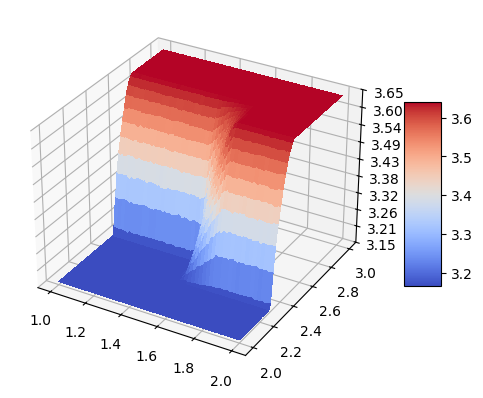

In [5]:
Z1 = zeros(shape=(len(domain1), len(domain2)))
for i, x1 in zip(range(len(domain1)), domain1):
    for j, x2 in zip(range(len(domain2)), domain2):
        qfie_l.build_inference_qc({'X1':x1, 'X2':x2}, draw_qc=False, distributed=False)
        qfie_l.execute(n_shots=5000,  transpile_info=False, plot_histo=False)[1]
        #print('alpha cuts', qfie_l.alpha_cuts)
        alpha_cuts_l = qfie_l.alpha_cuts

        qfie_u.build_inference_qc({'X1':x1, 'X2':x2}, draw_qc=False, distributed=False)
        qfie_u.execute(n_shots=5000,  transpile_info=False, plot_histo=False)[1]
        #print('alpha cuts', qfie_u.alpha_cuts)
        alpha_cuts_u = qfie_u.alpha_cuts

        constant_LOW =  IT2FS(domain3, const_mf, [alpha_cuts_u['low']], const_mf, [alpha_cuts_l['low']] )
        constant_HIGH =  IT2FS(domain3, const_mf, [alpha_cuts_u['high']], const_mf, [alpha_cuts_l['high']] )
        out_low = MEET(domain3, min_t_norm, Low1, constant_LOW)
        out_high = MEET(domain3, min_t_norm, High1, constant_HIGH)
        out = MEET(domain3, max_s_norm, out_low, out_high)

        centroids = Centroid(out, EIASC_algorithm, domain3)
        y_out = np.average(centroids)

        #it2out, tr = myIT2FLS.evaluate({"X1":x1, "X2":x2})
        Z1[i, j] = y_out

fig = plt.figure()
X1, X2 = meshgrid(domain1, domain2)
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X1, X2, Z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
Q_Surf = Z1

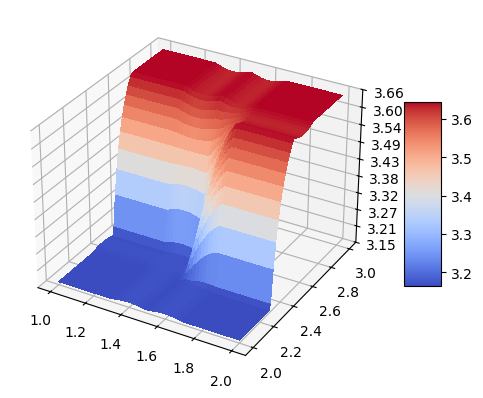

In [7]:
myIT2FLS = IT2Mamdani(product_t_norm, probabilistic_sum_s_norm)
#myIT2FLS = IT2Mamdani(min_t_norm, max_s_norm)


myIT2FLS.add_input_variable("X1")
myIT2FLS.add_input_variable("X2")

myIT2FLS.add_output_variable("Y")

myIT2FLS.add_rule([("X1", Small1),  ("X2", Small2)],  [("Y", Low1),  ])
myIT2FLS.add_rule([("X1", Small1),  ("X2", Medium2)], [("Y", Low1),  ])
myIT2FLS.add_rule([("X1", Small1),  ("X2", Large2)],  [("Y", Low1),  ])
myIT2FLS.add_rule([("X1", Medium1), ("X2", Small2)],  [("Y", Low1),  ])
myIT2FLS.add_rule([("X1", Medium1), ("X2", Medium2)], [("Y", Low1),  ])
myIT2FLS.add_rule([("X1", Medium1), ("X2", Large2)],  [("Y", High1), ])
myIT2FLS.add_rule([("X1", Large1),  ("X2", Small2)],  [("Y", High1), ])
myIT2FLS.add_rule([("X1", Large1),  ("X2", Medium2)], [("Y", High1), ])
myIT2FLS.add_rule([("X1", Large1),  ("X2", Large2)],  [("Y", High1), ])

X1, X2 = meshgrid(domain1, domain2)
Z1 = zeros(shape=(len(domain1), len(domain2)))
for i, x1 in zip(range(len(domain1)), domain1):
    for j, x2 in zip(range(len(domain2)), domain2):
        it2out, tr = myIT2FLS.evaluate({"X1":x1, "X2":x2})
        Z1[i, j] = crisp(tr["Y"])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X1, X2, Z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [10]:
C_surf = Z1
def calculate_rmsd(Z1, Z2):
    if Z1.shape != Z2.shape:
        raise ValueError("Z1 and Z2 must have the same shape")
    difference = Z1 - Z2
    squared_diff = difference ** 2
    mean_squared_diff = np.mean(squared_diff)
    rmsd = np.sqrt(mean_squared_diff)
    return rmsd
calculate_rmsd(Q_Surf,C_surf)

np.float64(0.008295632704973362)